<a href="https://colab.research.google.com/github/valesierrai/Integracion-de-Datos-y-Prospectiva/blob/main/L%C3%B3gica_Borrosa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Lógica Borrosa**

##0. Se cargan las librerias de trabajo

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##1. Se carga la Base de Datos

In [ ]:
nxl = "/content/drive/MyDrive/Colab Notebooks/Integración de Datos y Prospectiva/Bases de Datos/7. LógicaBorrosa_EVERGREEEN_Clase.xlsx"
XDB = pd.read_excel(nxl, sheet_name= 0)

#Se definien las variables de trabajo
XDB = np.array(XDB[['Eventos (Mes)', 'Severidad (KUSD)']])
print(XDB)

[[ 4.          2.86714059]
 [20.          6.42094137]
 [22.          2.17418093]
 ...
 [53.          1.90511915]
 [19.          1.32914048]
 [21.          4.84790494]]


##2. Proceso de Clústerización de las Variables

In [ ]:
#Semilla
np.random.seed(42)

#Cualidades por variable
NC=5

**Clusterización de los Eventos (Frecuencia (Mes))**

In [ ]:
mkmf = KMeans(n_clusters=NC, init='random',random_state=42)
mkmf.fit(XDB[:,0].reshape(-1,1))

XCf = mkmf.cluster_centers_

#Los organizamos de menor a mayor
XCf = np.array(sorted(XCf))
print("Los clústers son: \n", XCf.T)

#Labels - Cualidades
lbf= ['Muy Pocos', 'Pocos', 'Más o Menos', 'Muchos', 'Bastantes']
print("Las cualidades son: \n", lbf)

Los clústers son: 
 [[ 6.17984694 17.20535714 27.42467949 38.52183908 51.41522491]]
Las cualidades son: 
 ['Muy Pocos', 'Pocos', 'Más o Menos', 'Muchos', 'Bastantes']


In [ ]:
#Se busca la base de cada conjunto borroso (Valor de Pertenencia)
sigmaf = np.zeros((NC, 1))

for j in range(NC):
  sigmaf[j,]= np.sum(np.abs(XCf-XCf[j]))/4

print("La base de los conjuntos es: \n", sigmaf.T)

La base de los conjuntos es: 
 [[27.46192822 19.19279556 16.63796498 19.41225488 29.08229425]]


**Clusterización de la Severidad (KUSD) -> Gasto Promedio por Evento**

In [ ]:
mkms = KMeans(n_clusters=NC, init='random',random_state=42)
mkms.fit(XDB[:,1].reshape(-1,1))

XCs = mkms.cluster_centers_

#Los organizamos de menor a mayor
XCs = np.array(sorted(XCs))
print("Los clústers son: \n", XCs.T)

#Labels - Cualidades
lbs= ['Muy Bajo', 'Bajo', 'Medio', 'Alto', 'Muy Alto']
print("Las cualidades son: \n", lbs)

Los clústers son: 
 [[ 3.13318373  8.57540888 17.14839968 33.55760506 55.19521753]]
Las cualidades son: 
 ['Muy Bajo', 'Bajo', 'Medio', 'Alto', 'Muy Alto']


In [ ]:
#Se busca la base de cada conjunto borroso (Valor de Pertenencia)
sigmas = np.zeros((NC, 1))

for j in range(NC):
  sigmas[j,]= np.sum(np.abs(XCs-XCs[j]))/4

print("La base de los conjuntos es: \n", sigmas.T)

La base de los conjuntos es: 
 [[25.48597406 21.40430519 19.26105749 23.36335884 39.59156819]]


**Se procede con la obtención del mapa de pérdidas - Matriz de Pérdidas**

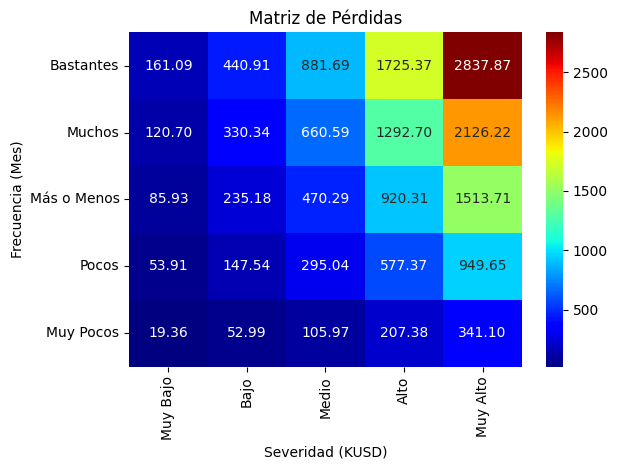

In [ ]:
MP = np.outer(XCf, XCs) #Convolución - Multiplicar todo con todo

MP_ordenada= MP[::-1,:] #Inversión Vertical

#Reorganizamos también las etiquetas de frecuencia en el mismo orden
lbf_ordenada = lbf[::-1]

#Graficamos
plt.figure()
sns.heatmap(MP_ordenada, annot=True, cmap= 'jet', fmt= '.2f')
plt.title('Matriz de Pérdidas')
plt.xlabel('Severidad (KUSD)')
plt.ylabel('Frecuencia (Mes)')
plt.xticks(np.arange(len(lbs))+ 0.5,lbs, rotation=90)
plt.yticks(np.arange(len(lbf_ordenada)) + 0.5, lbf_ordenada, rotation=0)
plt.tight_layout()
plt.show()

**Evaluamos valores de Frecuencia y Severidad**

In [ ]:
#Se evalua un solo valor de Eventos (Frecuencia)
Xf= 5
VPf = np.exp(-0.5*((XCf-Xf)/sigmaf)**2)
print("El número de contenedores en tierra:", Xf)
print("Los labels de frecuencia son: \n", lbf)
print("Los valores de pertenencia a los conjuntos borrosos son: \n", VPf.T)

El número de contenedores en tierra: 5
Los labels de frecuencia son: 
 ['Muy Pocos', 'Pocos', 'Más o Menos', 'Muchos', 'Bastantes']
Los valores de pertenencia a los conjuntos borrosos son: 
 [[0.99907752 0.81692644 0.4032152  0.22515044 0.279822  ]]


In [ ]:
#Se evalua un solo valor de Severidad
Xs= 20
VPs = np.exp(-0.5*((XCs-Xs)/sigmas)**2)
print("Pérdida promedio de contenedores en tierra:", Xs)
print("Los labels de frecuencia son: \n", lbs)
print("Los valores de pertenencia a los conjuntos borrosos son: \n", VPs.T)

Pérdida promedio de contenedores en tierra: 20
Los labels de frecuencia son: 
 ['Muy Bajo', 'Bajo', 'Medio', 'Alto', 'Muy Alto']
Los valores de pertenencia a los conjuntos borrosos son: 
 [[0.80332591 0.86723472 0.98910043 0.84504089 0.67359743]]


**Se procede con la construcción de la matriz de pertenencia - Matriz Borrosa**

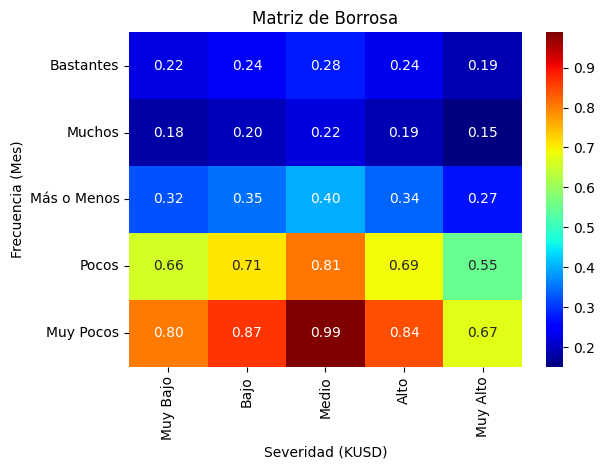

In [ ]:
MB= np.outer(VPf, VPs);
MB_ordenada= MB[::-1,:] #Inversión Vertical
lbf_ordenada = lbf[::-1]

#Graficamos
plt.figure()
sns.heatmap(MB_ordenada, annot=True, cmap= 'jet', fmt= '.2f')
plt.title('Matriz de Borrosa')
plt.xlabel('Severidad (KUSD)')
plt.ylabel('Frecuencia (Mes)')
plt.xticks(np.arange(len(lbs))+ 0.5,lbs, rotation=90)
plt.yticks(np.arange(len(lbf_ordenada)) + 0.5, lbf_ordenada, rotation=0)
plt.tight_layout()
plt.show()

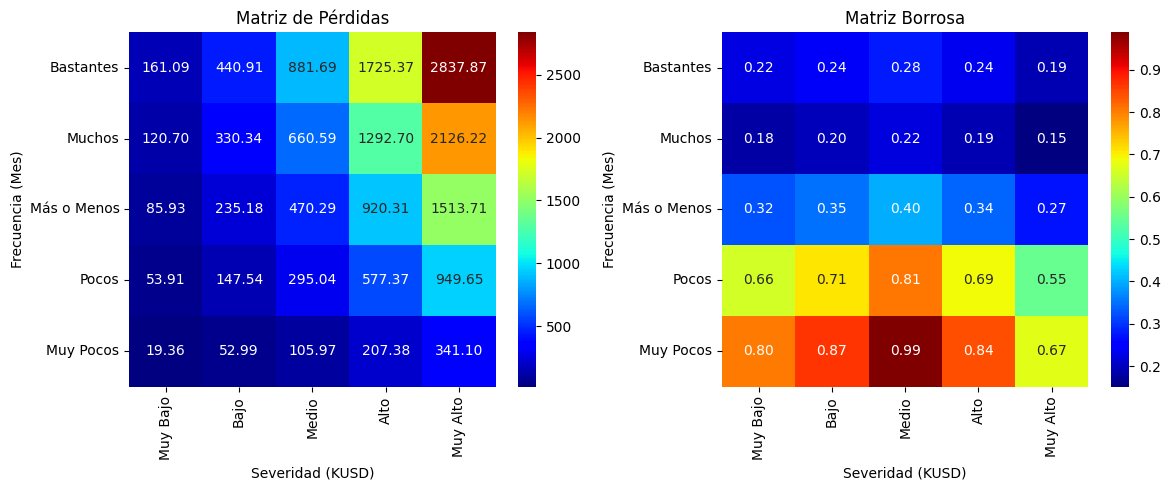

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 fila, 2 columnas

#Primer heatmap
sns.heatmap(MP_ordenada, annot=True, cmap='jet', fmt='.2f', ax=axes[0])
axes[0].set_title('Matriz de Pérdidas')
axes[0].set_ylabel('Frecuencia (Mes)')
axes[0].set_xlabel('Severidad (KUSD)')
axes[0].set_yticks(np.arange(len(lbf_ordenada)) + 0.5)
axes[0].set_yticklabels(lbf_ordenada, rotation=0)
axes[0].set_xticks(np.arange(len(lbs)) + 0.5)
axes[0].set_xticklabels(lbs, rotation=90)

#Segundo heatmap
sns.heatmap(MB_ordenada, annot=True, cmap='jet', fmt='.2f', ax=axes[1])
axes[1].set_title('Matriz Borrosa')
axes[1].set_ylabel('Frecuencia (Mes)')
axes[1].set_xlabel('Severidad (KUSD)')
axes[1].set_yticks(np.arange(len(lbf_ordenada)) + 0.5)
axes[1].set_yticklabels(lbf_ordenada, rotation=0)
axes[1].set_xticks(np.arange(len(lbs)) + 0.5)
axes[1].set_xticklabels(lbs, rotation=90)

plt.tight_layout()
plt.show()

**Se procede a la estimiación de la pérdida**

Text(-25.152777777777786, 0.5, 'Frecuencia (Mes)')

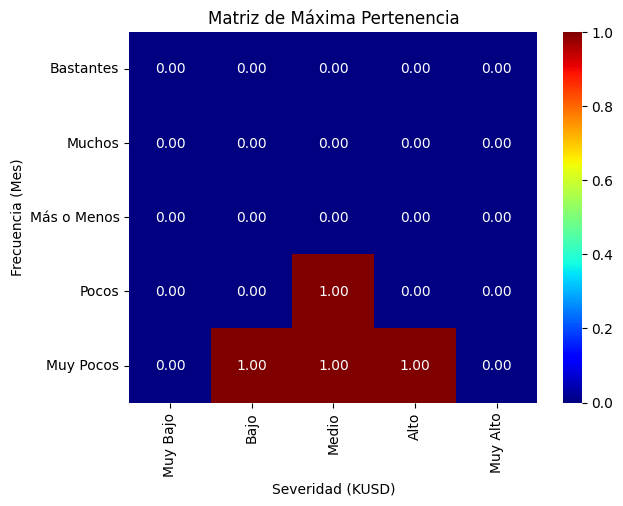

In [ ]:
VMB = np.array(sorted(MB.flatten(), reverse= True)) #Organiza de menor a mayor los valores de la matriz de pertenencia

MT = np.zeros((5,5))

#np.where(MB== VMB[0]) Donde está el mayor valor de pertenencia

for i in range(4):              #Digame donde están los 4 valores de pertenencia más grandes
  MT[np.where(MB==VMB[i])] = 1

MT_ordenada = MT[::-1,:] #Inversión Vertical
lbf_ordenada = lbf[::-1]

plt.figure()
sns.heatmap(MT_ordenada, annot=True, cmap= 'jet', fmt= '.2f')
plt.xticks(np.arange(len(lbs))+ 0.5,lbs, rotation=90)
plt.yticks(np.arange(len(lbf_ordenada)) + 0.5, lbf_ordenada, rotation=0)
plt.tight_layout()
plt.title('Matriz de Máxima Pertenencia')
plt.xlabel('Severidad (KUSD)')
plt.ylabel('Frecuencia (Mes)')

**Se procede con el cálculo de la pérdida**

In [ ]:
print("La pérdida matemática es:", Xf*Xs)
XLDAm = np.sum(MP*MB*MT)/np.sum(MB*MT)
print("La pérdida borrosa es:", XLDAm) #La pérdida puede llegar hasta este límite

La pérdida matemática es: 100
La pérdida borrosa es: 160.86121784504775


##**Muestreo de las Variables Aleatorias de Frecuencia y Severidad (Muestreo de la Pérdida)**

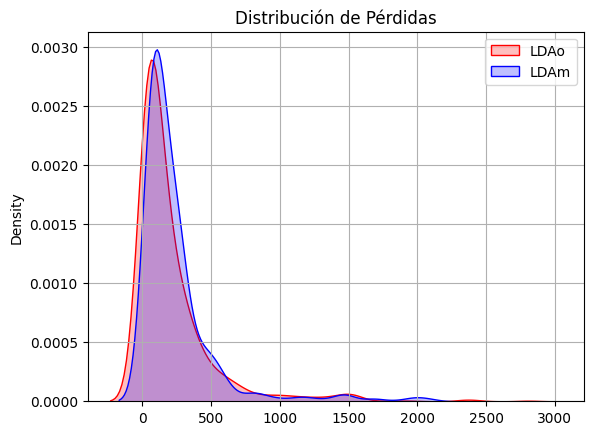

In [ ]:
#DataFrame de Frecuencia
dff= pd.DataFrame(XDB[:,0])

#DataFrame de Severidad
dfs= pd.DataFrame(XDB[:,1])

#Se procede con el muestreo
Xfm= np.array(dff.sample(n=1000))
Xsm= np.array(dfs.sample(n=1000))

#Distribución agregada de las Pérdidas - Loss Distribution Approach
XLDAm= np.zeros((1000,1))#Distribución agregada de pérdidas borrosa
XLDA= np.zeros((1000,1)) #Distribución agregada de pérdidas original

for k in range(1000):
  #print(k, Xfm[k], Xsm[k], Xfm[k]*Xsm[k])
  VPf = np.exp(-0.5*((XCf-Xfm[k])/sigmaf)**2)
  VPs = np.exp(-0.5*((XCs-Xsm[k])/sigmas)**2)
  MB= np.outer(VPf, VPs) #Matriz Borrosa

  #Buscamos los puntos de máximo pertenencia
  VMB = np.array(sorted(MB.flatten(), reverse= True))
  MT = np.zeros((5,5))

  for i in range(4):              #Digame donde están los 4 valores de pertenencia más grandes
    MT[np.where(MB==VMB[i])] = 1

  XLDAm[k]=np.sum(MP*MB*MT)/np.sum(MB*MT) #Pérdida Borrosa - Estructura Estadística de las Variables
  XLDA[k]= Xfm[k]*Xsm[k] #Pérdida Matemática Simple

plt.figure()
sns.kdeplot(x=XLDA.flatten(), fill= True, color='red', label='LDAo')
sns.kdeplot(x=XLDAm.flatten(), fill= True, color='blue', label='LDAm')
plt.title('Distribución de Pérdidas')
plt.legend()
plt.grid()
plt.show()

##**Repositorio para las Matrices de Impacto y Gestión**

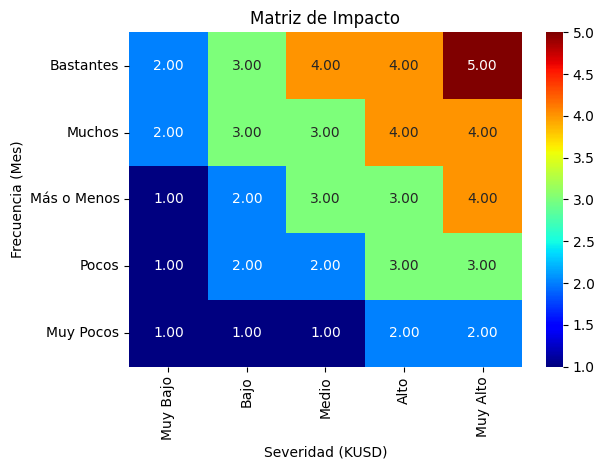

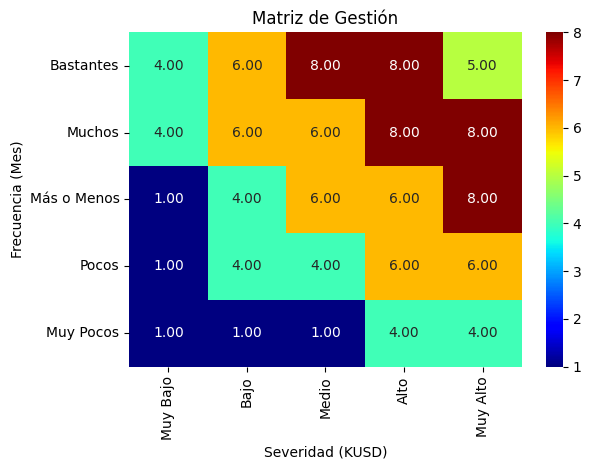

In [ ]:
#Se crea la matriz de impacto
MI=np.array([[1,1,1,2,2],
             [1,2,2,3,3],
             [1,2,3,3,4],
             [2,3,3,4,4],
             [2,3,4,4,5]])

MI_ordenada= MI[::-1, :]

#La matriz de gestión es utilizada para mitigar el impacto
NG=2 #Nivel de Gestion
MG=MI.astype(float).copy()  #Matriz de Gestión
MG[(MG>1)& (MG<5)]*=NG
MG_ordenada= MG[::-1, :]

#Matriz de Impacto
plt.figure()
sns.heatmap(MI_ordenada, annot=True, cmap='jet', fmt= '.2f')
plt.title('Matriz de Impacto')
plt.xlabel('Severidad (KUSD)')
plt.ylabel('Frecuencia (Mes)')
plt.xticks(np.arange(len(lbs))+ 0.5,lbs, rotation=90)
plt.yticks(np.arange(len(lbf_ordenada)) + 0.5, lbf_ordenada, rotation=0)
plt.tight_layout()

#Matriz de Gestión
plt.figure()
sns.heatmap(MG_ordenada, annot=True, cmap='jet', fmt= '.2f')
plt.title('Matriz de Gestión')
plt.xlabel('Severidad (KUSD)')
plt.ylabel('Frecuencia (Mes)')
plt.xticks(np.arange(len(lbs))+ 0.5,lbs, rotation=90)
plt.yticks(np.arange(len(lbf_ordenada)) + 0.5, lbf_ordenada, rotation=0)
plt.tight_layout()

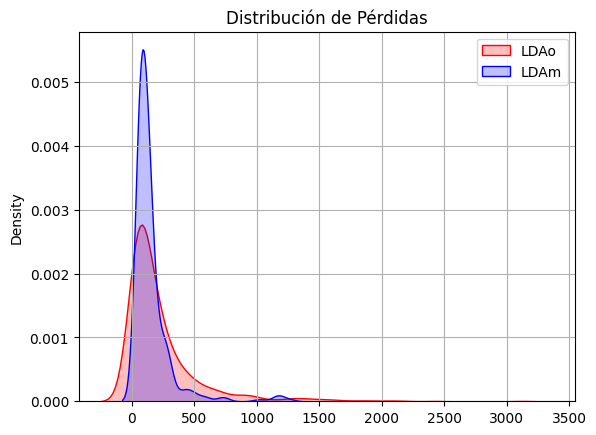

In [ ]:
#Distribución de Pérdidas con MI y MG

#DataFrame de Frecuencia
dff= pd.DataFrame(XDB[:,0])

#DataFrame de Severidad
dfs= pd.DataFrame(XDB[:,1])

#Se procede con el muestreo
Xfm= np.array(dff.sample(n=1000))
Xsm= np.array(dfs.sample(n=1000))

#Distribución agregada de las Pérdidas - Loss Distribution Approach
XLDAm= np.zeros((1000,1))#Distribución agregada de pérdidas borrosa
XLDA= np.zeros((1000,1)) #Distribución agregada de pérdidas original

for k in range(1000):
  #print(k, Xfm[k], Xsm[k], Xfm[k]*Xsm[k])
  VPf = np.exp(-0.5*((XCf-Xfm[k])/sigmaf)**2)
  VPs = np.exp(-0.5*((XCs-Xsm[k])/sigmas)**2)
  MB= np.outer(VPf, VPs) #Matriz Borrosa

  #Buscamos los puntos de máximo pertenencia
  VMB = np.array(sorted(MB.flatten(), reverse= True))
  MT = np.zeros((5,5))

  for i in range(4):              #Digame donde están los 4 valores de pertenencia más grandes
    MT[np.where(MB==VMB[i])] = 1

  XLDAm[k]=np.sum(MP*MB*MT*MI)/np.sum(MB*MT*MG) #Pérdida Borrosa - Estructura Estadística de las Variables
  XLDA[k]= Xfm[k]*Xsm[k] #Pérdida Matemática Simple

plt.figure()
sns.kdeplot(x=XLDA.flatten(), fill= True, color='red', label='LDAo')
sns.kdeplot(x=XLDAm.flatten(), fill= True, color='blue', label='LDAm')
plt.title('Distribución de Pérdidas')
plt.legend()
plt.grid()
plt.show()

In [ ]:
#Importamos Librerias Adicionales
from scipy.stats import skew

#Asimetría
valor_skew= skew(XLDAm)
print('Skew Gestionados:', valor_skew)
valor_skew = skew(XLDA)
print('Skew Originales:', valor_skew)

Skew Gestionados: [4.02927994]
Skew Originales: [3.42414658]


##**Análisis de Resultados**

De acuerdo con las matrices de gestión e impacto implementadas para la mitigación de los riesgos de las operaciones portuarias, se puedo observar que a mayor nivel de gestión, las distribuciones de pérdidas obtienen coeficientes de asimetría menores, para la Gestión 1:1 cual es, Gestión 1:2 cual es, Gestión 1:3 cual es. Igualmente para estas gestiones, se puede observar que las pérdidas pueden disminuir ¿Cuáles mostrar? La media son las pérdidas esperadas, OpVar son las pérdidas catastróficas (percentil 99,9%), y las pérdidas no esperadas es el promedio entre las esperadas y el OpVar. Es importante tener en cuenta desde el aseguramiento, que estas matrices se deben implementar para un período de tiempo de un año (horizonte de cobertura de una poliza).